In [1]:
import pandas as pd
df=pd.read_csv('financialindependence2020.2-2021.csv')
df

,Unnamed: 0,author,created_utc,domain,full_link,num_comments,over_18,score,selftext,subreddit,title,num_crossposts
0,0,mazur1984,1589970341,self.financialindependence,https://www.reddit.com/r/financialindependence...,2,False,1,"Posted this on Personal Finance also, sorry if...",financialindependence,Velocity Banking,0
1,1,Henquewl,1589967241,self.financialindependence,https://www.reddit.com/r/financialindependence...,1,False,1,"Guys, what do you think about the following pr...",financialindependence,Improving your financial position through Guap...,0
2,2,Big__Hoss,1589966526,self.financialindependence,https://www.reddit.com/r/financialindependence...,5,False,1,"There is so much information, but I am not sur...",financialindependence,"I am a 19 year old student, what should I focu...",0
3,3,ChrisLJ111,1589963006,self.financialindependence,https://www.reddit.com/r/financialindependence...,0,False,1,[removed],financialindependence,Robert Kiyosaki book (recomendation),0
4,4,AutoModerator,1589962054,self.financialindependence,https://www.reddit.com/r/financialindependence...,45,False,1,Self-promotion (ie posting about projects/busi...,financialindependence,"Weekly Self-Promotion Thread - May 20, 2020",0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,AutoModerator,1611914412,self.financialindependence,https://www.reddit.com/r/financialindependence...,1214,False,1,Please use this thread to have discussions wh...,financialindependence,"Daily FI discussion thread - Friday, January 2...",0
996,996,RobertCameron20,1611910884,self.financialindependence,https://www.reddit.com/r/financialindependence...,0,False,1,[removed],financialindependence,Which is the best business to start amidst COV...,0
997,997,bioimposter,1611899963,self.financialindependence,https://www.reddit.com/r/financialindependence...,0,False,1,I’d love your opinions and feedback on this. I...,financialindependence,Pay off student loans or wait...?,0
998,998,vvelouriaa,1611892979,self.financialindependence,https://www.reddit.com/r/financialindependence...,2,False,1,Wondering how the experience has ben for peopl...,financialindependence,Does anyone have experience buying Bitcoin wit...,0


In [2]:
df2=df.dropna(subset=['title'])[['title','selftext']]
df2 #leave it to anaylze later

,title,selftext
0,Velocity Banking,"Posted this on Personal Finance also, sorry if..."
1,Improving your financial position through Guap...,"Guys, what do you think about the following pr..."
2,"I am a 19 year old student, what should I focu...","There is so much information, but I am not sur..."
3,Robert Kiyosaki book (recomendation),[removed]
4,"Weekly Self-Promotion Thread - May 20, 2020",Self-promotion (ie posting about projects/busi...
...,...,...
995,"Daily FI discussion thread - Friday, January 2...",Please use this thread to have discussions wh...
996,Which is the best business to start amidst COV...,[removed]
997,Pay off student loans or wait...?,I’d love your opinions and feedback on this. I...
998,Does anyone have experience buying Bitcoin wit...,Wondering how the experience has ben for peopl...


In [3]:
#Take interesting columns
df1=df[['selftext','num_comments','score','title']]
#drop those with text=NA
df1=df1.dropna(subset=['selftext'])
#drop meaningless text
df1=df1[(df1.selftext!='[removed]') & (df1.selftext!='[deleted]')].reset_index()
#drop duplicate
duplicate = df1.duplicated()
print('There are', duplicate.sum(), 'duplicated values.')
df1=df1.drop_duplicates()
len(df1)

There are 0 duplicated values.


540

### Convert to lowercase

In [4]:
df1['selftext']=df1['selftext'].str.lower()
df1['selftext']

0      posted this on personal finance also, sorry if...
1      guys, what do you think about the following pr...
2      there is so much information, but i am not sur...
3      self-promotion (ie posting about projects/busi...
4      please use this thread to have discussions whi...
                             ...                        
535    i have never done anything financial in my lif...
536     \n\nplease  use this thread to discuss how am...
537    please  use this thread to have discussions wh...
538    i’d love your opinions and feedback on this. i...
539    wondering how the experience has ben for peopl...
Name: selftext, Length: 540, dtype: object

### Remove emoji

In [5]:
def remove_emoji(text):
    text = text.encode('ascii', 'ignore').decode()
    return text

In [6]:
df1['selftext']=df1['selftext'].apply(lambda x: remove_emoji(x))
df1['selftext'][0]

"posted this on personal finance also, sorry if it's a double read for some of you!\n\nalright....i'm sure that this won't be well received but i want to know what people think of 'velocity banking' (best video i've seen is titled the method on youtube), whether it works or not, scam/not a scam, and then finally how it compares to just taking your monthly surplus and simply putting it into the market.\n\nquick background, 35 yo, own a house (but will be selling within 6 months to move to japan), wife and 1 child. only debt we have is the mortgage and our monthly spending (no cc, no car payments). \n\nquick financials:\nchecking/savings-16,000\nvanguard ira/brokerage-26,000\ntsp(combined)-120,000\ncurrently have about $500/mo extra (i'm deployed currently, tsp set at 60%), when i get back i'll scale it back and will have more like $1500-2000/mo free.\n\nfeel like we're doing well but would just love to see some conversation for or against velocity banking vs investing vs anything else. 

### Remove url, punctuation, and special characters

In [7]:
#Using regular expression
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    x = re.sub("[0-9]+", '', x) #remove numbers
    return x

In [8]:
df1['selftext']=df1['selftext'].apply(lambda x: remove_other(x))
df1['selftext'][0]

"posted this on personal finance also, sorry if it a double read for some of you!\n\nalright....i sure that this won be well received but i want to know what people think of  banking' (best video i seen is titled the method on youtube), whether it works or not, scam/not a scam, and then finally how it compares to just taking your monthly surplus and simply putting it into the market.\n\nquick background,  yo, own a house (but will be selling within  months to move to japan), wife and  child. only debt we have is the mortgage and our monthly spending (no cc, no car payments). \n\nquick financials:\nchecking/savings-,\nvanguard ira/brokerage-,\ntsp(combined)-,\ncurrently have about  /mo extra (i deployed currently, tsp set at %), when i get back i scale it back and will have more like  -/mo free.\n\nfeel like we doing well but would just love to see some conversation for or against velocity banking vs investing vs anything else. let open it up."

### Remove stopwords

In [9]:
import nltk
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))
print(stop_words) #all preloaded stopwords

{'this', 'theirs', 'have', 'i', "didn't", 'what', 'after', 'only', "that'll", 'as', 'from', 'to', 'any', 'yourself', 'needn', 'that', 'above', 'd', 'below', 'then', 'about', 'for', 'against', 'now', 'here', 'once', 'm', 'didn', "you'd", 'between', "won't", 'itself', 'more', 'their', "aren't", 'had', 'aren', 'who', 'mightn', 'an', 'than', 'by', 'hers', 'them', 'mustn', 'on', 'no', 'some', 'your', 'be', "it's", 'shan', "shouldn't", 'are', "mustn't", 'were', 'out', 'where', 'hasn', "isn't", 'yours', 'too', "you'll", 'her', 'our', 'shouldn', 'y', 'most', 'very', "hasn't", 'll', 'and', 'myself', 'my', 've', "you've", 'further', 'me', 'is', 'they', 'yourselves', 'does', 'should', "mightn't", 'again', 'just', 'wasn', 'nor', "weren't", 'whom', 'was', 'doing', "haven't", 'its', 'of', 'having', 'until', 'up', 'you', "shan't", 'will', 'ain', 'at', 'so', 'do', 'such', 'during', 'why', 'there', 'same', 'can', 'but', 'all', 're', "couldn't", 'being', 'wouldn', 'a', 'ourselves', 'the', 'in', "wasn't"

In [10]:
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [11]:
df1['selftext']=df1['selftext'].apply(lambda x: remove_stopwords(x))
df1['selftext'][0]

"posted personal finance also, sorry double read you! alright....i sure well received want know people think banking' (best video seen titled method youtube), whether works not, scam/not scam, finally compares taking monthly surplus simply putting market. quick background, yo, house (but selling within months move japan), wife child. debt mortgage monthly spending (no cc, car payments). quick financials: checking/savings-, vanguard ira/brokerage-, tsp(combined)-, currently /mo extra (i deployed currently, tsp set %), get back scale back like -/mo free. feel like well would love see conversation velocity banking vs investing vs anything else. let open up."

In [12]:
spec_chars = ["!",'“','"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df1['selftext'] = df1['selftext'].str.replace(char, ' ')
    df1['selftext'] = df1['selftext'].str.split().str.join(" ")
df1['selftext']

0      posted personal finance also sorry double read...
1      guys think following project guap strategy fun...
2      much information sure information applies sinc...
3      self promotion ie posting projects businesses ...
4      please use thread discussions feel warrant new...
                             ...                        
535    never done anything financial life besides ban...
536    please use thread discuss amazingly cheap are ...
537    please use thread discussions feel warrant new...
538    id love opinions feedback this k federal stude...
539    wondering experience ben people buying bitcoin...
Name: selftext, Length: 540, dtype: object

### Check the resulting text to see whatelse we need to clean

In [13]:
df1['selftext'][4]

'please use thread discussions feel warrant new post sub rules posting questions basics personal finance investing topics relaxed little bit here rules memes spam self promotion excessive rudeness politics still apply look faq subreddit posting see question frequently asked since post tend get busy consider sorting comments new instead best top see newest posts'

### Example of Lemmatization(change rules to rule)

In [14]:
import nltk
#nltk.download('wordnet') #uncommented for 1st time running
from nltk.stem import WordNetLemmatizer

words=df1['selftext'][4].split()
lemmatizer = WordNetLemmatizer()
for word in words:
    print(word + " ---> " + lemmatizer.lemmatize(word))

please ---> please
use ---> use
thread ---> thread
discussions ---> discussion
feel ---> feel
warrant ---> warrant
new ---> new
post ---> post
sub ---> sub
rules ---> rule
posting ---> posting
questions ---> question
basics ---> basic
personal ---> personal
finance ---> finance
investing ---> investing
topics ---> topic
relaxed ---> relaxed
little ---> little
bit ---> bit
here ---> here
rules ---> rule
memes ---> meme
spam ---> spam
self ---> self
promotion ---> promotion
excessive ---> excessive
rudeness ---> rudeness
politics ---> politics
still ---> still
apply ---> apply
look ---> look
faq ---> faq
subreddit ---> subreddit
posting ---> posting
see ---> see
question ---> question
frequently ---> frequently
asked ---> asked
since ---> since
post ---> post
tend ---> tend
get ---> get
busy ---> busy
consider ---> consider
sorting ---> sorting
comments ---> comment
new ---> new
instead ---> instead
best ---> best
top ---> top
see ---> see
newest ---> newest
posts ---> post


In [15]:
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [16]:
df1['selftext']= df1['selftext'].str.split().apply(lambda x: lemmatize(x))
df1['selftext'][4]

'please use thread discussion feel warrant new post sub rule posting question basic personal finance investing topic relaxed little bit here rule meme spam self promotion excessive rudeness politics still apply look faq subreddit posting see question frequently asked since post tend get busy consider sorting comment new instead best top see newest post'

### Split words

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vec=CountVectorizer()
counts=vec.fit_transform(df1['selftext'])
counts=counts.toarray()
count_df=pd.DataFrame(counts,columns=vec.get_feature_names())
big_df=pd.concat((df1,count_df),axis=1)
big_df.head()

,index,selftext,num_comments,score,title,aa,aapl,abandon,abandoned,ability,...,youth,youtube,youtuber,youtubers,youve,yr,yuan,zerion,zero,zillow
0,0,posted personal finance also sorry double read...,2,1,Velocity Banking,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,guy think following project guap strategy fund...,1,1,Improving your financial position through Guap...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,much information sure information applies sinc...,5,1,"I am a 19 year old student, what should I focu...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,self promotion ie posting project business ope...,45,1,"Weekly Self-Promotion Thread - May 20, 2020",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,please use thread discussion feel warrant new ...,490,1,"Daily FI discussion thread - May 20, 2020",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# List of all words across rows
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df
count_words(df1['selftext'])

,words,count
0,year,604
1,money,408
2,time,321
3,like,304
4,get,258
...,...,...
95,week,81
96,something,80
97,well,79
98,currently,79


In [61]:
stop_words.update({'would','k','im','could','also','amp','much','one','like','get','since'})
df1['selftext']=df1['selftext'].apply(lambda x: remove_stopwords(x))
count_df=count_words(df1['selftext'])
count_df.head(30)

,words,count
0,year,604
1,money,408
2,time,321
3,account,248
4,post,218
5,job,216
6,work,206
7,fire,182
8,saving,181
9,income,178


In [53]:
?WordCloud

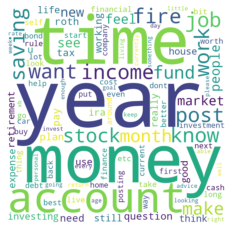

In [62]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=' '.join(count_df.words)

# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0,background_color='white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()